In [34]:
# Import library
# Library for preprocessing data
import pandas as pd
import numpy as np

# Library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import necessary modules
import matplotlib.pyplot as plt


# Classification

In [35]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [36]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [37]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [38]:
x= iris_df.iloc[:, :-1]
y= iris_df.iloc[:, -1]

In [39]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [42]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

print("Accuracy: {0}".format(knn.score(x_test, y_test)))


Accuracy: 0.9666666666666667


In [44]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over
for i, k in enumerate(neighbors):
    
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(x_train, y_train)

  test_accuracy[i] = knn.score(x_test, y_test)

  train_accuracy[i] = knn.score(x_train, y_train)

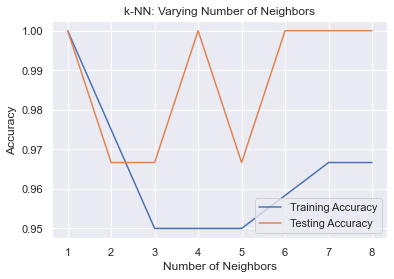

In [45]:
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [46]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [47]:
X = iris_df.iloc[:,0:4].values
y = iris_df.iloc[:,4].values

In [48]:
print(X[0:5])
print(y[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0. 0. 0. 0. 0.]


In [49]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

In [50]:
print(y1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [51]:
Y = pd.get_dummies(y1).values
print(Y[0:5])

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [53]:
print(X_train[0:5])


[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]


In [54]:
print(y_train[0:5])


[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 0 1]]


In [55]:
print(X_test[0:5])


[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]]


In [56]:
print(y_test[0:5])


[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 0 0]]


In [57]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
  ])
model

In [58]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
model.fit(X_train, y_train, batch_size=50, epochs=100)


Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 2.0952 - accuracy: 0.3083
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 1.9647 - accuracy: 0.3083
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 1.8826 - accuracy: 0.3083
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 1.8149 - accuracy: 0.3083
Epoch 5/100
3/3 [==============================] - 0s 1ms/step - loss: 1.7559 - accuracy: 0.3083
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 1.6971 - accuracy: 0.3083
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 1.6441 - accuracy: 0.3083
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 1.6004 - accuracy: 0.3083
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 1.5532 - accuracy: 0.3083
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 1.5061 - accuracy: 0.3083
Epoch 11/100
3/3 [===========

In [60]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.48670369386672974
Test accuracy: 0.8666666746139526


In [61]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', loss)
print('Train accuracy:', accuracy)

Train loss: 0.4211897552013397
Train accuracy: 0.925000011920929


# Recommendation Systems

In [62]:
movies_df = pd.read_csv('./movies.csv', encoding='latin-1')
ratings_df = pd.read_csv('./ratings.csv', encoding='latin-1')
users_df = pd.read_csv('./users.csv', encoding='latin-1')

In [63]:
movies_df.dropna()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
94,95,Broken Arrow (1996),Action|Thriller
95,96,In the Bleak Midwinter (1995),Comedy
97,98,Shopping (1994),Action|Thriller
98,99,Heidi Fleiss: Hollywood Madam (1995),Documentary


In [64]:
movies_df = movies_df.dropna(axis=0)
users_df = users_df.dropna(axis=0)
ratings_df = ratings_df.dropna(axis=0)

In [65]:
movies_df.isnull().sum()

movie_id    0
title       0
genres      0
dtype: int64

In [66]:
def getListGenres(x,listGen):
    arr = x.split("|")
    for i in arr:
        isIn= False
        for j in listGen:
            if(j ==i):
                isIn=True
        if(isIn==False):
            listGen.append(i)
    

In [67]:
def vectorizedData(x):
    temp = []
    for i in listGen:
        if i in x:
            temp.append(1)
        else:
            temp.append(0)
    Ij.append(temp)


## A) Content-Based Recommendation Model 

In [68]:
listGen = []
movies_df['genres'].apply(getListGenres,listGen=listGen)
listGen

['Animation',
 "Children's",
 'Comedy',
 'Adventure',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Sci-Fi',
 'Documentary',
 'War',
 'Musical']

In [69]:
Ij=[]
movies_df['genres'].apply(vectorizedData)
Ij[:4]

[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]]

In [70]:
users_df

,user_id,gender,age,occupation,zipcode,age_desc,occ_desc
0,1,F,1,10,48067,Under 18,K-12 student
1,2,M,56,16,70072,56+,self-employed
2,3,M,25,15,55117,25-34,scientist
3,4,M,45,7,2460,45-49,executive/managerial
4,5,M,25,20,55455,25-34,writer
...,...,...,...,...,...,...,...
95,96,F,25,16,78028,25-34,self-employed
96,97,F,35,3,66210,35-44,clerical/admin
97,98,F,35,7,33547,35-44,executive/managerial
98,99,F,1,10,19390,Under 18,K-12 student


In [71]:
def getUserWithGenres(movies_id,users_genres):
    movies_arr = movies_id.split('|')
    movies_arr = [eval(x) for x in movies_arr]
    user_genres=[]
    for i in movies_arr:
        a = movies_df.loc[movies_df['movie_id'] == i]
        if(a.empty):
            continue
        else:
            genres = a.values[0,2].split('|')
            for k in genres:
                isIn= False
                for l in user_genres:
                    if(k ==l):
                        isIn=True
                if(isIn==False):
                    user_genres.append(k)
    users_genres.append(user_genres)

In [72]:
ratings_df['movie_id']=ratings_df['movie_id'].astype(str)

new_ratings = ratings_df.sort_values(['user_id'],ascending=False).groupby(['user_id'], as_index=False).agg({'movie_id': '|'.join})
new_ratings

,user_id,movie_id
0,1,42|31|32|34|35|36|37|39|45|43|44|28|46|47|48|4...
1,2,37|28|29|30|31|35|36|45|40|41|25|49|50|51|52|5...
2,3,30|39|31|32|33|34|35|36|38|46|40|41|42|43|44|4...
3,4,46|32|34|35|37|39|40|43|44|49|47|48|29|50|1|52...
4,5,40|28|29|33|34|35|36|39|44|41|43|45|46|47|48|2...
...,...,...
95,96,26|28|29|30|31|34|36|41|38|39|40|43|44|46|24|4...
96,97,41|28|32|33|34|35|36|39|40|44|42|43|26|45|46|4...
97,98,36|27|28|30|31|33|34|35|40|37|39|23|41|43|44|4...
98,99,43|33|35|36|37|38|39|41|52|44|45|48|49|50|51|3...


In [73]:
def vectorizedUserGen(users_genres,listGen):
    usrRelaGens=[]
    for i in users_genres:
        temp=[]
        a = ' '.join(map(str, i))
        for j in listGen:
            if(j in a):
                temp.append(1)
            else:
                temp.append(0)
        usrRelaGens.append(temp)
    return usrRelaGens

In [74]:
users_genres=[]
new_ratings['movie_id'].apply(getUserWithGenres,users_genres=users_genres)
Uj=vectorizedUserGen(users_genres,listGen)
Uj

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [75]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(Ij,Uj)
cosine_sim

array([[0.46291005, 0.46291005, 0.4472136 , ..., 0.46291005, 0.4472136 ,
        0.4472136 ],
       [0.46291005, 0.46291005, 0.4472136 , ..., 0.46291005, 0.4472136 ,
        0.4472136 ],
       [0.37796447, 0.37796447, 0.36514837, ..., 0.37796447, 0.36514837,
        0.36514837],
       ...,
       [0.37796447, 0.37796447, 0.36514837, ..., 0.37796447, 0.36514837,
        0.36514837],
       [0.26726124, 0.26726124, 0.25819889, ..., 0.26726124, 0.25819889,
        0.25819889],
       [0.37796447, 0.37796447, 0.36514837, ..., 0.37796447, 0.36514837,
        0.36514837]])

In [76]:
movies_df

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
94,95,Broken Arrow (1996),Action|Thriller
95,96,In the Bleak Midwinter (1995),Comedy
97,98,Shopping (1994),Action|Thriller
98,99,Heidi Fleiss: Hollywood Madam (1995),Documentary


## B) Collaborative Filtering Recommendation Model by Users 

In [77]:
movies_train,movies_test = train_test_split(movies_df,test_size = 0.5)
ratings_train, ratings_test = train_test_split(ratings_df,test_size=0.5)
users_train,users_test = train_test_split(users_df,test_size=0.5)

In [78]:
ratings_train_data_matrix = ratings_train.pivot_table(index=['user_id'], columns=['movie_id'],
values=['rating']).astype('float64')
ratings_test_data_matrix = ratings_test.pivot_table(index=['user_id'], columns=['movie_id'],
values=['rating']).astype('float64')

In [79]:
ratings_train_data_matrix

rating                                               ...            \
movie_id      1   10  100   11   12   13   14   15   16   17  ...   90   91   
user_id                                                       ...             
1           3.0  2.0  NaN  4.0  NaN  1.0  NaN  5.0  NaN  NaN  ...  4.0  NaN   
2           3.0  4.0  3.0  NaN  NaN  NaN  2.0  NaN  NaN  4.0  ...  4.0  5.0   
3           3.0  NaN  NaN  NaN  NaN  NaN  4.0  NaN  NaN  NaN  ...  5.0  3.0   
4           NaN  5.0  5.0  3.0  NaN  3.0  NaN  NaN  2.0  NaN  ...  NaN  3.0   
5           2.0  NaN  NaN  NaN  NaN  3.0  NaN  3.0  NaN  NaN  ...  NaN  4.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
96          3.0  NaN  NaN  4.0  5.0  NaN  NaN  NaN  3.0  NaN  ...  3.0  NaN   
97          NaN  NaN  NaN  4.0  NaN  NaN  NaN  5.0  NaN  NaN  ...  3.0  1.0   
98          4.0  NaN  NaN  NaN  4.0  5.0  NaN  3.0  NaN  3.0  ...  NaN  NaN   
99          4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  4.0  NaN  ...  NaN  NaN   
100         4.0  NaN  5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  4.0  NaN   

                                                  
movie_id   92   93   94   95   96   97   98   99  
user_id                                           
1         NaN  NaN  4.0  3.0  3.0  NaN  5.0  NaN  
2         4.0  NaN  5.0  NaN  NaN  2.0  NaN  NaN  
3         NaN  4.0  4.0  3.0  NaN  NaN  NaN  NaN  
4         4.0  5.0  4.0  5.0  4.0  NaN  NaN  4.0  
5         NaN  3.0  NaN  NaN  NaN  NaN  5.0  NaN  
...       ...  ...  ...  ...  ...  ...  ...  ...  
96        NaN  NaN  NaN  1.0  3.0  NaN  NaN  2.0  
97        NaN  3.0  NaN  NaN  NaN  5.0  4.0  4.0  
98        4.0  NaN  NaN  NaN  NaN  5.0  4.0  NaN  
99        NaN  NaN  4.0  4.0  4.0  NaN  NaN  3.0  
100       NaN  3.0  NaN  NaN  NaN  4.0  NaN  5.0  

[100 rows x 100 columns]

In [80]:
ratings_train_data_matrix_norm = ratings_train_data_matrix.subtract(ratings_train_data_matrix.mean(axis=1),axis='rows')

In [81]:
ratings_train_data_matrix_norm

rating                                                    \
movie_id         1        10       100        11        12        13   
user_id                                                                
1        -0.525000 -1.525000       NaN  0.475000       NaN -2.525000   
2        -0.567568  0.432432 -0.567568       NaN       NaN       NaN   
3        -0.545455       NaN       NaN       NaN       NaN       NaN   
4              NaN  1.564103  1.564103 -0.435897       NaN -0.435897   
5        -1.500000       NaN       NaN       NaN       NaN -0.500000   
...            ...       ...       ...       ...       ...       ...   
96       -0.485714       NaN       NaN  0.514286  1.514286       NaN   
97             NaN       NaN       NaN  0.468085       NaN       NaN   
98        0.550000       NaN       NaN       NaN  0.550000  1.550000   
99        0.714286       NaN       NaN       NaN       NaN       NaN   
100       0.387097       NaN  1.387097       NaN       NaN       NaN   

                                                  ...                      \
movie_id        14        15        16        17  ...        90        91   
user_id                                           ...                       
1              NaN  1.475000       NaN       NaN  ...  0.475000       NaN   
2        -1.567568       NaN       NaN  0.432432  ...  0.432432  1.432432   
3         0.454545       NaN       NaN       NaN  ...  1.454545 -0.545455   
4              NaN       NaN -1.435897       NaN  ...       NaN -0.435897   
5              NaN -0.500000       NaN       NaN  ...       NaN  0.500000   
...            ...       ...       ...       ...  ...       ...       ...   
96             NaN       NaN -0.485714       NaN  ... -0.485714       NaN   
97             NaN  1.468085       NaN       NaN  ... -0.531915 -2.531915   
98             NaN -0.450000       NaN -0.450000  ...       NaN       NaN   
99             NaN       NaN  0.714286       NaN  ...       NaN       NaN   
100            NaN       NaN       NaN       NaN  ...  0.387097       NaN   

                                                                      \
movie_id        92        93        94        95        96        97   
user_id                                                                
1              NaN       NaN  0.475000 -0.525000 -0.525000       NaN   
2         0.432432       NaN  1.432432       NaN       NaN -1.567568   
3              NaN  0.454545  0.454545 -0.545455       NaN       NaN   
4         0.564103  1.564103  0.564103  1.564103  0.564103       NaN   
5              NaN -0.500000       NaN       NaN       NaN       NaN   
...            ...       ...       ...       ...       ...       ...   
96             NaN       NaN       NaN -2.485714 -0.485714       NaN   
97             NaN -0.531915       NaN       NaN       NaN  1.468085   
98        0.550000       NaN       NaN       NaN       NaN  1.550000   
99             NaN       NaN  0.714286  0.714286  0.714286       NaN   
100            NaN -0.612903       NaN       NaN       NaN  0.387097   

                              
movie_id        98        99  
user_id                       
1         1.475000       NaN  
2              NaN       NaN  
3              NaN       NaN  
4              NaN  0.564103  
5         1.500000       NaN  
...            ...       ...  
96             NaN -1.485714  
97        0.468085  0.468085  
98        0.550000       NaN  
99             NaN -0.285714  
100            NaN  1.387097  

[100 rows x 100 columns]

In [82]:
user_similarity = ratings_train_data_matrix.T.corr()
user_similarity

user_id,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.077643,0.110698,0.010196,0.308126,2.594254e-01,-0.327439,0.043513,0.247214,0.134749,...,0.184186,0.420736,0.238195,-2.151186e-01,0.219971,-0.202801,0.254441,-0.389637,-0.395948,0.079825
2,0.077643,1.000000,-0.360993,0.129762,0.038585,5.025189e-02,-0.173344,-0.523044,-0.229976,-0.127646,...,0.064910,0.171166,-0.335531,5.178571e-01,-0.170005,0.297665,-0.436115,-0.161316,-0.314510,-0.298848
3,0.110698,-0.360993,1.000000,-0.341836,-0.568711,4.119263e-01,0.201008,0.581068,-0.444474,-0.079911,...,-0.322458,0.071450,0.132578,-2.600000e-01,-0.394255,-0.133333,-0.391233,-0.496139,-0.110760,-0.232139
4,0.010196,0.129762,-0.341836,1.000000,0.104601,4.576043e-01,0.282106,0.306269,0.424471,0.101281,...,-0.150294,0.161493,-0.148992,4.661283e-01,0.386976,-0.308126,0.418330,0.126025,-0.023982,0.356034
5,0.308126,0.038585,-0.568711,0.104601,1.000000,-8.827348e-02,-0.018023,-0.256776,0.121716,0.224105,...,-0.379729,0.081145,-0.282902,-3.565252e-01,0.272166,0.149786,0.285965,0.206559,-0.100901,0.472206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.202801,0.297665,-0.133333,-0.308126,0.149786,1.188423e-17,-0.013091,-0.573480,0.212512,-0.485269,...,0.409769,0.178551,-0.634839,4.232074e-01,-0.040129,1.000000,-0.250756,-0.141264,-0.601202,-0.268028
97,0.254441,-0.436115,-0.391233,0.418330,0.285965,-3.708099e-01,-0.176486,0.065818,0.178683,0.078513,...,0.114326,0.075755,0.114552,-1.900372e-02,0.461468,-0.250756,1.000000,0.256353,0.342009,0.075629
98,-0.389637,-0.161316,-0.496139,0.126025,0.206559,3.287980e-02,0.485913,-0.276172,0.138912,-0.284823,...,0.337157,0.114614,-0.147012,3.081377e-01,0.352864,-0.141264,0.256353,1.000000,0.057516,0.353591
